# Scatterplots
By Matthew Ueckermann, Megan Englert, Drew Koense
## What is a scatterplot?
A scatterplot is a visualization where 2 quantitative variables of an observation are plotted against each other on the x and y axis.
## What is a scatterplot used for?
Scatterplots are used to visualize the correlation between 2 quantitative variables, i.e. does a certain value of one variable increase the likelihood of a higher or lower value of the other variable?
Some good examples of where a scatterplot could be useful:
- You survey students for their GPA and SAT score, you can plot each individual's GPA and SAT score in a scatterplot to see if there is the strength of the relationship between GPA and SAT score.
- You run an experiment to measure the rate constant of a reaction at different temperatures. You can plot the natural log of the rate constant over inverse temperature to see if the reaction follows the Arrhenius equation.

### Exercise
Consider the [Business Dynamics Dataset](https://corgis-edu.github.io/corgis/csv/business_dynamics/) from the CORGIS Project. Come up with an example of two quantitative variables that could be plotted against each other in a scatterplot.

## What are some mistakes people make when using scatterplots?
- *Using the correct values*: The two values of each point should be associated with each other! The two values you're plotting should connect to the same observation If you have a list of GPAs and a list of SAT scores but don't know which GPA is attached to the same person as which score, you can't make a scatterplot.
- *Overplotting*: Don't overplot the graph to the point where it's just a massive blob with no distinguishable points.
- *Using enough points*: With too few points, it could look like something has a stronger or weaker relationship than it actually does. As in most graphs, more data is better with the correct spacing.
- *Non-linear relationships*: Depending on the data, two variables can be related in shape other than a straight line. Especially when calculating the numeric value of correlation, you may need to transform the data with a function, like logarithm or exponentiating. A perfect parabola can have a 0 correlation, which would indicate no relationship.
- *Correlation is not causation*: As we saw with the pirate example in class, make sure you don't make assumptions about causation. When discussing scatterplots, be sure to always say that the two values are correlated or related, rather than that one causes the other, unless you have an experiment to prove it.

## What are some important variations in scatterplots?
- *Three variables*: More than two variables can be represented by changing the size of each marker to respresent a change in a quantitative variable or something like color for qualitative variables. An additional axis can also be added, but it's pretty ugly and bad.
- *Trendlines*: Adding trendlines helps to better represent the relationship between two variables.
- *Correlation*: The value of correlation, `r`, is often calculated and displayed alongside scatterplots. It is a value between -1 and 1, where the greater the absolute value of `r`, the stronger the linear relationship between the two variables. Correlation can be calculated using the `corr()` method in Pandas.

## What are some alternatives to scatterplots?
- *2D Density Plot*: As shown on [this website](https://www.chrisstucchio.com/blog/2012/dont_use_scatterplots.html), plotting the density of the points instead of plotting the actual points cna provide a much easier to read graph if there is an extremely large amount of data.

Other than this, scatterplots are relatively unique in the way that they reflect on variable's relation to another.

## Okay, but can we make Scatter Plots in matplotlib?

Can use the plt.scatter() function, passing a pandas series in the x and y. Need to seperately label the x and y axis. 

business_dynamics.csv is from the [CORGIS project site](https://corgis-edu.github.io/corgis/csv/business_dynamics/)

Example code is given below:

In [2]:
# matplotlib example
# Example altered from https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/
import matplotlib.pyplot as plt
import pandas as pd

# Reading data from CORGIS website
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/business_dynamics/business_dynamics.csv')
df.head()

# Data is shown below in dataframe

,State,Year,Data.DHS Denominator,Data.Number of Firms,Data.Calculated.Net Job Creation,Data.Calculated.Net Job Creation Rate,Data.Calculated.Reallocation Rate,Data.Establishments.Entered,Data.Establishments.Entered Rate,Data.Establishments.Exited,Data.Establishments.Exited Rate,Data.Establishments.Physical Locations,Data.Firm Exits.Count,Data.Firm Exits.Establishment Exit,Data.Firm Exits.Job Destruction,Data.Job Creation.Births,Data.Job Creation.Continuers,Data.Job Creation.Count,Data.Job Creation.Rate,Data.Job Creation.Rate/Births,Data.Job Destruction.Continuers,Data.Job Destruction.Count,Data.Job Destruction.Deaths,Data.Job Destruction.Rate,Data.Job Destruction.Rate/Deaths
0,Alabama,1977,933909,52371,46776,5.0,31.0,10634,17.2,8057,13.1,62852,5623,5641,36602,89869,101653,191522,20.5,9.6,85855,144746,58891,15.5,6.3
1,Alaska,1977,108134,6480,-1940,-1.8,69.4,2028,27.0,1564,20.8,7725,1035,1039,6757,19259,18286,37545,34.7,17.8,25981,39485,13504,36.5,12.5
2,Arizona,1977,589552,36477,29997,5.1,39.8,9379,22.0,6230,14.6,44113,4332,4357,29116,70645,76781,147426,25.0,12.0,72063,117429,45366,19.9,7.7
3,Arkansas,1977,529709,35499,42803,8.1,29.0,7291,18.3,5455,13.7,40702,3970,3994,19678,44527,75201,119728,22.6,8.4,44394,76925,32531,14.5,6.1
4,California,1977,6484959,362887,656693,10.1,33.4,88187,20.7,60589,14.2,438766,39693,39932,276475,779164,960214,1739378,26.8,12.0,594123,1082685,488562,16.7,7.5


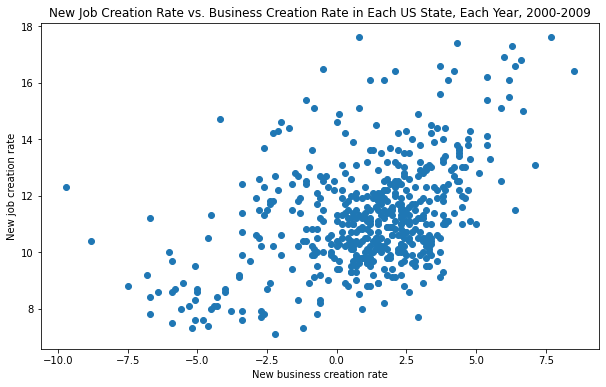

In [ ]:
# Increases the plot size in the Jupyter notebook; this part is not necessary
fig, ax = plt.subplots(figsize=(10, 6))

#Grabbing the first decade of the 2000s from the data set
df_specified_years = df[(df.Year >= 2000) & (df.Year <= 2009)]

# Plots the Job Creation Rate on the x axis against the Business Creation Rate for each state for the year 2000
plt.scatter(x = df_specified_years["Data.Calculated.Net Job Creation Rate"], y = df_specified_years["Data.Establishments.Entered Rate"])

# Applies x and y axis labels and a title
plt.xlabel("New business creation rate")
plt.ylabel("New job creation rate")
plt.title("New Job Creation Rate vs. Business Creation Rate in Each US State, Each Year, 2000-2009")

# Displays the plot we've been editing
plt.show()

## Okay, but what about Seaborn?

You can also use the seaborn.scatterplot() function, passing a dataframe as the data and then selecting the x and y axis through passing the column.

Example code is given below:

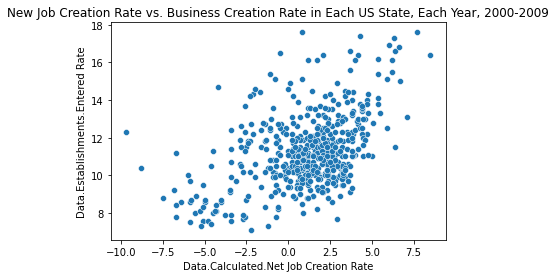

In [3]:
# seaborn example
# Example altered from https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading data from CORGIS
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/business_dynamics/business_dynamics.csv')

# Grabbing only one decade of data
df_specified_years = df[(df.Year >= 2000) & (df.Year <= 2009)]

# Create scatterplot - note: labels come from dataframe
scatter = sns.scatterplot(data = df_specified_years, x = "Data.Calculated.Net Job Creation Rate", y = "Data.Establishments.Entered Rate")
# Set scatterplot title
scatter = scatter.set_title("New Job Creation Rate vs. Business Creation Rate in Each US State, Each Year, 2000-2009")
scatter
plt.show()

### Exercise
Use either Matplotlib or Seaborn to plot the two variables you selected above!

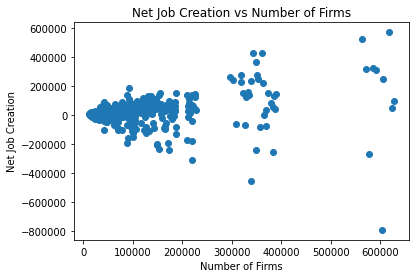

In [5]:
# Put code here:
plt.scatter(x = df_specified_years["Data.Number of Firms"], y = df_specified_years["Data.Calculated.Net Job Creation"])
plt.title("Net Job Creation vs Number of Firms")
plt.xlabel("Number of Firms")
plt.ylabel("Net Job Creation")
plt.show()

## What about adding a trendline?

Can use the regression plot function which will add a trendline if passed the same information as above in seaborn but using the lmplot function instead. Must use other statistics packages to find the goodness of fit, which is not covered here but this [stack overflow article](https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text) covers it.

Note that this function can be used to fit several lines of best fit, with linear as the default, more info is [here](https://seaborn.pydata.org/tutorial/regression.html)

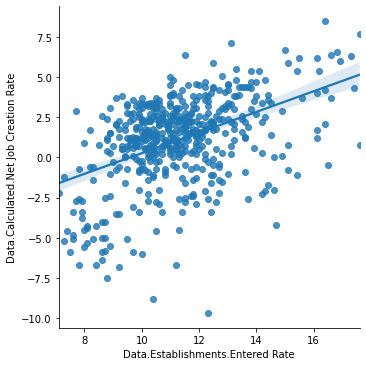

In [6]:
sns.lmplot(data = df_specified_years, y = "Data.Calculated.Net Job Creation Rate", x = "Data.Establishments.Entered Rate")
plt.show()

### Exercise
Try adding the trendline!

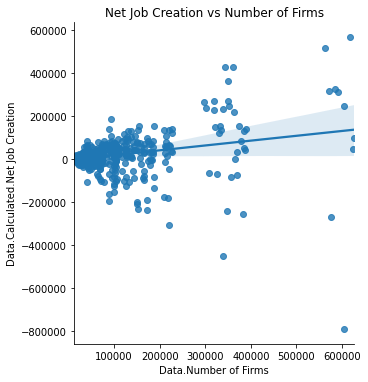

In [9]:
# Put code here:
sns.lmplot(data = df_specified_years, x = "Data.Number of Firms", y  = "Data.Calculated.Net Job Creation")
plt.title("Net Job Creation vs Number of Firms")
plt.show()

## Checking your understanding

1. What common problem in scatterplot design is present in the following example that uses data from all years?



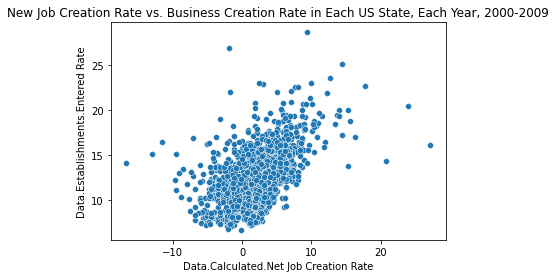

In [ ]:
scatter = sns.scatterplot(data = df, x = "Data.Calculated.Net Job Creation Rate", y = "Data.Establishments.Entered Rate")
scatter = scatter.set_title("New Job Creation Rate vs. Business Creation Rate in Each US State, Each Year, 2000-2009")
plt.show()

too many data points 

2. Can you use scatterplots with categorical data?

No

3. Can you create a scatterplot with two variables that are not attached to corresponding observations? For example, two lists each in their own order.

No

4. Do trends have to be linear?

No